In [1]:
import os
os.chdir('D://scratch_backup//perl//jdftx_mod_test//ethylene//methylethyl//morebands')
import sys
sys.path.append('C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs//')
import numpy as np
import jdftxfuncs as jfunc
import cohpfuncs as cfunc
import plotfuncs as pfunc
import matplotlib.pyplot as plt

In [2]:
wk, igarr, kpoints, nstates = jfunc.parse_gvecfile('ethylene.Gvectors')

In [3]:
mu = -0.126918749

In [4]:

bandfile='ethylene.bandProjections'
gvecfile='ethylene.Gvectors'
eigfile='ethylene.eigenvals'
outfile='ethylene.out'
#S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


In [5]:
savename='CC_bond_strengths_dEn3.png'
Emin = np.min(E)
Emax = np.max(E)
dE = 0.001
Emax, Emin = cfunc.adjust_Ebounds(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)

In [6]:
orbs_cmethyl = orbs_dict['C #1']
orbs_cmid = orbs_dict['C #2']
orbs_cvinyl = orbs_dict['C #3']

In [7]:
COHP_mid_methyl = pfunc.ez_pCOHP_sum(orbs_cmid, orbs_cmethyl, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_mid_vinyl = pfunc.ez_pCOHP_sum(orbs_cmid, orbs_cvinyl, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_mid_methyl_int = pfunc.get_integrated_array(COHP_mid_methyl, dE)
COHP_mid_vinyl_int = pfunc.get_integrated_array(COHP_mid_vinyl, dE)

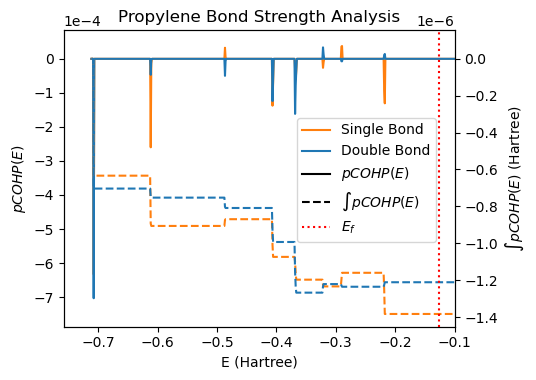

In [56]:
scaler = 1.3
fig, ax = plt.subplots(figsize=(4.2*scaler, 3*scaler))
ax.plot(Egrid, COHP_mid_methyl, color='C1', label='Single Bond')
ax.plot(Egrid, COHP_mid_vinyl, color='C0', label='Double Bond')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$pCOHP(E)$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axint = ax.twinx()
axint.plot(Egrid, COHP_mid_methyl_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_mid_vinyl_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int pCOHP(E)$ (Hartree)')
axint.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
line1 = ax.plot(0,0,color='black',label=r'$pCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int pCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
plt.axvline(x=mu, color='r', label=r'$E_f$', linestyle='dotted')
plt.title('Propylene Bond Strength Analysis')
plt.xlim(xmax = -0.1)


# fig.legend(loc='lower left', bbox_to_anchor=(0.22, 0.11))
fig.legend(loc='lower left', bbox_to_anchor=(0.54, 0.35))
fig.tight_layout()
prelim_fig_dir = "C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//prelim_figs//"
savename = "bond_compare_prelims.png"
fig.savefig(prelim_fig_dir + savename)

In [26]:
posns, names, R = jfunc.get_coords_vars('ethylene.out')

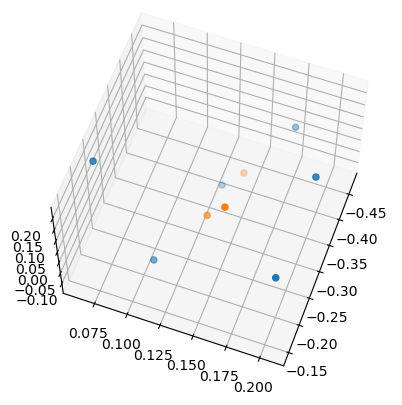

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posns[:6,0], posns[:6,1], posns[:6,2])
ax.scatter(posns[6:,0], posns[6:,1], posns[6:,2])
ax.view_init(elev=60, azim=20)
plt.show()

In [17]:
names

['H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C']

In [9]:
posns

array([[-0.45848777,  0.23850343,  0.16924278],
       [-0.18287496,  0.15991123,  0.11005239],
       [-0.43744763,  0.06946308,  0.17563916],
       [-0.84548295,  0.13967383, -0.11555472],
       [-0.88322403,  0.15404568,  0.06058871],
       [-0.3903121 ,  0.13671105, -0.0918723 ],
       [-0.76109901,  0.14642473, -0.0219154 ],
       [-0.51001999,  0.1449141 , -0.00847953],
       [-0.38951681,  0.15380547,  0.11980547]])

In [10]:
names

['H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C']

In [12]:
names[:6]

['H', 'H', 'H', 'H', 'H', 'H']